# Importando e lendo o Dataframe com a  biblioteca Pandas

In [1]:
import pandas as pd
noshow = pd.read_csv('../input/medicalappointmentnoshown/KaggleV2-May-2016.csv',sep = ',')
noshow.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


# Verificando a presença de valores nulos dentro do dataframe

In [2]:
noshow.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# Relação entre a Variável Target (noshow) com todas as variáveis categóricas do dataframe

In [3]:
print('--> No-show vs Alcoholism')
print(noshow.groupby(['No-show','Alcoholism'])['PatientId'].count())
print('-------------------------------------------------------------------')

print('--> No-show vs Diabetes')
print(noshow.groupby(['No-show','Diabetes'])['PatientId'].count())
print('-------------------------------------------------------------------')

print('--> No-show vs SMS_received')
print(noshow.groupby(['No-show','SMS_received'])['PatientId'].count())
print('-------------------------------------------------------------------')


print('--> No-show vs Hipertension')
print(noshow.groupby(['No-show','Hipertension'])['PatientId'].count())
print('-------------------------------------------------------------------')

print('--> No-show vs Scholarship')
print(noshow.groupby(['No-show','Scholarship'])['PatientId'].count())
print('-------------------------------------------------------------------')

print('--> No-show vs Handcap')
print(noshow.groupby(['No-show','Handcap'])['PatientId'].count())
print('-------------------------------------------------------------------')

print('--> No-show vs Gender')
print(noshow.groupby(['No-show','Gender'])['PatientId'].count())
print('-------------------------------------------------------------------')


--> No-show vs Alcoholism
No-show  Alcoholism
No       0             85525
         1              2683
Yes      0             21642
         1               677
Name: PatientId, dtype: int64
-------------------------------------------------------------------
--> No-show vs Diabetes
No-show  Diabetes
No       0           81695
         1            6513
Yes      0           20889
         1            1430
Name: PatientId, dtype: int64
-------------------------------------------------------------------
--> No-show vs SMS_received
No-show  SMS_received
No       0               62510
         1               25698
Yes      0               12535
         1                9784
Name: PatientId, dtype: int64
-------------------------------------------------------------------
--> No-show vs Hipertension
No-show  Hipertension
No       0               70179
         1               18029
Yes      0               18547
         1                3772
Name: PatientId, dtype: int64
----------------

# Distribuição das idades por no show

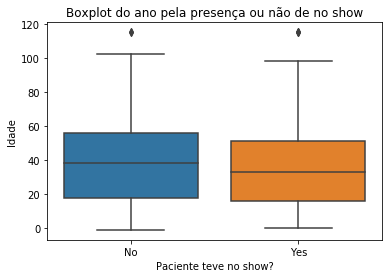

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
box1 = plt.subplots()
box1 = sns.boxplot(x='No-show', y='Age', data=noshow)
box1.set_title('Boxplot do ano pela presença ou não de no show')
box1.set_xlabel('Paciente teve no show?')
box1.set_ylabel('Idade')
plt.show()

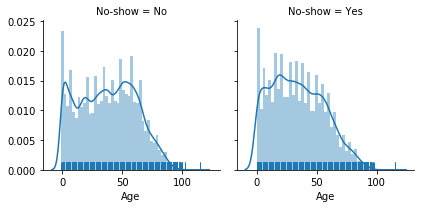

In [5]:
grafico = sns.FacetGrid(noshow, col='No-show')
grafico.map(sns.distplot, 'Age', rug=True)
plt.show()

# Substituição das idades negativas
Nesse caso foi utilizado a mediana de quem possui desfecho negativo devido a presença de valores abaixo de ser ter ocorrido em pessoas com desfecho negativo

In [6]:
#Filtrando pessoas com idade negativa
noshow[noshow['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [7]:
#capturando as mediana das pessoas com desfecho dnegativo
median_noshow_no = noshow[noshow['No-show']=='No']['Age'].median()
median_noshow_no

38.0

In [8]:
import numpy as np
noshow['Age'] = np.where(noshow['Age']<1,median_noshow_no,noshow['Age'])
print('No-show = Não com ajuste')
print('----------------------------')
print(noshow.loc[noshow['No-show'] == 'No','Age'].describe()) #nova descrição de idade

No-show = Não com ajuste
----------------------------
count    88208.000000
mean        39.039826
std         22.274966
min          1.000000
25%         21.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64


# Criando faixa etária

In [9]:
conditions  = [ noshow['Age'] < 10
               , (noshow['Age'] < 20) & (noshow['Age']>= 10)
               , (noshow['Age'] < 30) & (noshow['Age']>= 20)
               , (noshow['Age'] < 40) & (noshow['Age']>= 30)
               , (noshow['Age'] < 50) & (noshow['Age']>= 40)
               , (noshow['Age'] < 60) & (noshow['Age']>= 50)
               , (noshow['Age'] < 70) & (noshow['Age']>= 60)
               ,  noshow['Age'] >= 70 ]

choices     = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','>70']

noshow['fx_etaria'] = np.select(conditions, choices, default=np.nan)

# Transformação das variáveis datetime


In [10]:
noshow['ScheduledDay'] = pd.to_datetime(noshow['ScheduledDay'])
noshow['AppointmentDay'] = pd.to_datetime(noshow['AppointmentDay'])

#variaveis relacionada a scheduled
noshow['Scheduled_Month'] = noshow['ScheduledDay'].apply(lambda x: x.month)
noshow['Scheduled_Year'] = noshow['ScheduledDay'].apply(lambda x: x.year)
noshow['Scheduled_WeekDay'] = noshow['ScheduledDay'].apply(lambda x: x.strftime("%A"))

#variaveis reacionadas ao appointment
noshow['Appointment_Month'] = noshow['AppointmentDay'].apply(lambda x: x.month)
noshow['Appointment_Year'] = noshow['AppointmentDay'].apply(lambda x: x.year)
noshow['Appointment_WeekDay'] = noshow['AppointmentDay'].apply(lambda x: x.strftime("%A"))

#Diferenca entre datas
noshow['DeltaScheduleAppointment_Days'] = noshow['ScheduledDay']-noshow['AppointmentDay']
noshow['DeltaScheduleAppointment_Days'] = noshow['DeltaScheduleAppointment_Days']/np.timedelta64(1,'D')

#tratando dados diferenca negativa
noshow['DeltaScheduleAppointment_Days'] = np.where(noshow['DeltaScheduleAppointment_Days'] < 0 
                                                   ,0,noshow['DeltaScheduleAppointment_Days'] )


# OneHotEncoder nas variavéis categoricas Gender, Handcap, Appointment_WeekDay,Scheduled_WeekDay e faixa etária
Aplicando OneHotEncoder as variavéis se transformam em novas colunas onde 1 representa o valor afirmativo e 0 o valor negativo


In [11]:
from category_encoders.one_hot import OneHotEncoder
noshow_bin = noshow

binarizar = OneHotEncoder(cols= ['Gender','Handcap','Appointment_WeekDay','Scheduled_WeekDay','fx_etaria'],use_cat_names=True)
binarizar.fit(noshow_bin)
noshow_bin = binarizar.transform(noshow_bin)

noshow_bin.head()

,PatientId,AppointmentID,Gender_F,Gender_M,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,...,Scheduled_WeekDay_Saturday,Appointment_Month,Appointment_Year,Appointment_WeekDay_Friday,Appointment_WeekDay_Tuesday,Appointment_WeekDay_Monday,Appointment_WeekDay_Wednesday,Appointment_WeekDay_Thursday,Appointment_WeekDay_Saturday,DeltaScheduleAppointment_Days
0,2.987250e+13,5642903,1,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,...,0,4,2016,1,0,0,0,0,0,0.776481
1,5.589978e+14,5642503,0,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,...,0,4,2016,1,0,0,0,0,0,0.672535
2,4.262962e+12,5642549,1,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,...,0,4,2016,1,0,0,0,0,0,0.679907
3,8.679512e+11,5642828,1,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,...,0,4,2016,1,0,0,0,0,0,0.728831
4,8.841186e+12,5642494,1,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,...,0,4,2016,1,0,0,0,0,0,0.671794


# Padronizando das variáveis contínuas 
padronização = x - média/desvio padrao 
O processo faz com que todas minhas variaveis numéricas permanecam na mesma escala

In [12]:
noshow_bin.reset_index()

from sklearn import preprocessing
padronizar = preprocessing.StandardScaler().fit(noshow_bin[['Age','Scheduled_Month','Scheduled_Year'
                                                            ,'Appointment_Month','Appointment_Year'
                                                            ,'DeltaScheduleAppointment_Days']])

noshow_bin[['Age','Scheduled_Month','Scheduled_Year','Appointment_Month','Appointment_Year'
,'DeltaScheduleAppointment_Days']] = padronizar.transform(noshow_bin[['Age'
                                                                     ,'Scheduled_Month'
                                                                     ,'Scheduled_Year'
                                                                     ,'Appointment_Month'
                                                                     ,'Appointment_Year'
                                                                     ,'DeltaScheduleAppointment_Days']])

# Separando variável target das features

In [13]:
noshow_bin.columns

Index(['PatientId', 'AppointmentID', 'Gender_F', 'Gender_M', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap_0.0', 'Handcap_1.0', 'Handcap_2.0',
       'Handcap_3.0', 'Handcap_4.0', 'SMS_received', 'No-show',
       'fx_etaria_60-70', 'fx_etaria_50-60', 'fx_etaria_0-10', 'fx_etaria_>70',
       'fx_etaria_20-30', 'fx_etaria_30-40', 'fx_etaria_10-20',
       'fx_etaria_40-50', 'Scheduled_Month', 'Scheduled_Year',
       'Scheduled_WeekDay_Friday', 'Scheduled_WeekDay_Wednesday',
       'Scheduled_WeekDay_Tuesday', 'Scheduled_WeekDay_Thursday',
       'Scheduled_WeekDay_Monday', 'Scheduled_WeekDay_Saturday',
       'Appointment_Month', 'Appointment_Year', 'Appointment_WeekDay_Friday',
       'Appointment_WeekDay_Tuesday', 'Appointment_WeekDay_Monday',
       'Appointment_WeekDay_Wednesday', 'Appointment_WeekDay_Thursday',
       'Appointment_WeekDay_Saturday', 'DeltaScheduleAppointment_Days'],
      

In [14]:
x = noshow_bin.loc[:,['Age','Appointment_Month', 'Appointment_Year','Scheduled_Year','DeltaScheduleAppointment_Days'
                      ,'Scheduled_Month'#numericos
                      ,'Gender_F', 'Gender_M','Scholarship','Hipertension','Diabetes', 'Alcoholism'#categoricos
                      , 'Handcap_0.0', 'Handcap_1.0', 'Handcap_2.0','Handcap_3.0', 'Handcap_4.0'
                      , 'SMS_received','Scheduled_WeekDay_Friday'
                      ,'Scheduled_WeekDay_Wednesday', 'Scheduled_WeekDay_Tuesday'
                      ,'Scheduled_WeekDay_Thursday', 'Scheduled_WeekDay_Monday'
                      ,'Scheduled_WeekDay_Saturday','Appointment_WeekDay_Friday'
                      , 'Appointment_WeekDay_Tuesday','Appointment_WeekDay_Monday'
                      , 'Appointment_WeekDay_Wednesday','Appointment_WeekDay_Thursday'
                      , 'Appointment_WeekDay_Saturday','fx_etaria_60-70', 'fx_etaria_50-60'
                      , 'fx_etaria_0-10', 'fx_etaria_>70','fx_etaria_20-30', 'fx_etaria_30-40'
                      , 'fx_etaria_10-20','fx_etaria_40-50']]
y = noshow_bin.loc[:,'No-show']

In [15]:
from sklearn.preprocessing import LabelEncoder

x[['Gender_F', 'Gender_M','Scholarship','Hipertension','Diabetes', 'Alcoholism'
          , 'Handcap_0.0', 'Handcap_1.0', 'Handcap_2.0','Handcap_3.0', 'Handcap_4.0'
          , 'SMS_received','Scheduled_WeekDay_Friday'
          ,'Scheduled_WeekDay_Wednesday', 'Scheduled_WeekDay_Tuesday'
          ,'Scheduled_WeekDay_Thursday', 'Scheduled_WeekDay_Monday'
          ,'Scheduled_WeekDay_Saturday','Appointment_WeekDay_Friday'
          , 'Appointment_WeekDay_Tuesday','Appointment_WeekDay_Monday'
          , 'Appointment_WeekDay_Wednesday','Appointment_WeekDay_Thursday'
          , 'Appointment_WeekDay_Saturday','fx_etaria_60-70', 'fx_etaria_50-60'
          , 'fx_etaria_0-10', 'fx_etaria_>70','fx_etaria_20-30', 'fx_etaria_30-40'
          , 'fx_etaria_10-20','fx_etaria_40-50']].apply(LabelEncoder().fit_transform)

y = LabelEncoder().fit_transform(y)

# Dividindo o dataframe em 70% treino e 30% teste

In [16]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,random_state=1)

# Xgboost
modelo baseando em gradient boosting onde o previsor sucessor é criado baseado no residuo do previsor antecessor

recall: 0.5718015665796344
accuracy: 0.8002050725293284
---------------------------------------------
[[26315  6461]
 [  164   219]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.80      0.89     32776
           1       0.03      0.57      0.06       383

    accuracy                           0.80     33159
   macro avg       0.51      0.69      0.48     33159
weighted avg       0.98      0.80      0.88     33159



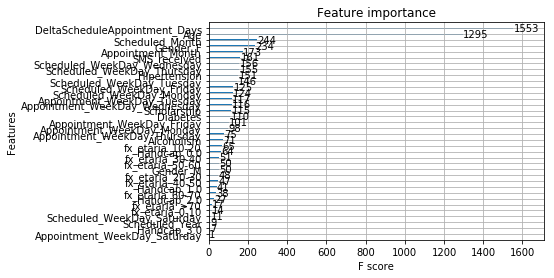

In [17]:
import xgboost as xgb
import matplotlib.pyplot as plt 
from sklearn.metrics import recall_score,accuracy_score,classification_report,confusion_matrix

xgboost_ = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.8, learning_rate = 0.2,
                max_depth = 7, n_estimators = 100,random_state=0)
xgboost_.fit(x_treino,y_treino)

#realização do predict
previsoes = xgboost_.predict(x_teste)

print('recall:' , recall_score(previsoes,y_teste))
print('accuracy:' , accuracy_score(previsoes,y_teste))
print('---------------------------------------------')
print(confusion_matrix(previsoes,y_teste))
print('---------------------------------------------')
print(classification_report(previsoes,y_teste))

xgb.plot_importance(xgboost_)
plt.show() 


In [18]:
#Visulaizando feature_importance
feature = []
for feature in zip(x_treino, xgboost_.feature_importances_):
    print(feature)

('Age', 0.032268096)
('Appointment_Month', 0.034130525)
('Appointment_Year', 0.0)
('Scheduled_Year', 0.012160218)
('DeltaScheduleAppointment_Days', 0.11714805)
('Scheduled_Month', 0.07953952)
('Gender_F', 0.018241117)
('Gender_M', 0.03126482)
('Scholarship', 0.025356395)
('Hipertension', 0.019756278)
('Diabetes', 0.01849717)
('Alcoholism', 0.028619392)
('Handcap_0.0', 0.020354493)
('Handcap_1.0', 0.030123152)
('Handcap_2.0', 0.018612163)
('Handcap_3.0', 0.0036880122)
('Handcap_4.0', 0.0)
('SMS_received', 0.059359226)
('Scheduled_WeekDay_Friday', 0.025761617)
('Scheduled_WeekDay_Wednesday', 0.02656314)
('Scheduled_WeekDay_Tuesday', 0.028878052)
('Scheduled_WeekDay_Thursday', 0.019585105)
('Scheduled_WeekDay_Monday', 0.021649161)
('Scheduled_WeekDay_Saturday', 0.013699001)
('Appointment_WeekDay_Friday', 0.024618244)
('Appointment_WeekDay_Tuesday', 0.01776577)
('Appointment_WeekDay_Monday', 0.021650713)
('Appointment_WeekDay_Wednesday', 0.018935265)
('Appointment_WeekDay_Thursday', 0.0193

# Tuning Hiperparâmetros - Grid Search - Xgboost
Tentar todos as combinações possíveis utilizando os hiperparametros passados, foi utilizado os hiperparametros:
learning_rate = taxa de aprendizado, max_depth = máxima rofundidade das arvores, colsample_bytree = porcentagem de colunas utilizadas em cada árvore

In [19]:
from sklearn.model_selection import GridSearchCV

parametros = [{'learning_rate':[0.01,0.1,0.2],
                'max_depth':[5,7],
                'colsample_bytree':[0.7,0.8,0.9]}]

xgboost = xgb.XGBClassifier(objective ='reg:logistic', n_estimators = 100,random_state=0)

grid_search =  GridSearchCV(xgboost,parametros,scoring='recall',cv=4,verbose=1)

grid_search.fit(x_treino,y_treino)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  6.1min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     objective='reg:logistic', random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,
   

In [20]:
#Melhores hiperparametros
grid_search.best_params_

{'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7}

# LGBM

In [21]:
from skopt import dummy_minimize
import lightgbm as lgb   
gradient = lgb.LGBMClassifier(learning_rate=0.09955911573844406 #resultado do randomsearch
                             ,colsample_bytree=0.7472177953903952  #resultado do randomsearch
                             ,max_depth=6  #resultado do randomsearch
                             ,n_estimators=176  #resultado do randomsearch
                              ,random_state=0
                                )
gradient.fit(x_treino,y_treino)
previsoes = gradient.predict(x_teste)
print('recall:' , recall_score(previsoes,y_teste))
print('accuracy:' , accuracy_score(previsoes,y_teste))
print('---------------------------------------------')
print(confusion_matrix(previsoes,y_teste))
print('---------------------------------------------')
print(classification_report(previsoes,y_teste))

recall: 0.5990990990990991
accuracy: 0.7998733375554148
---------------------------------------------
[[26390  6547]
 [   89   133]]
---------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     32937
           1       0.02      0.60      0.04       222

    accuracy                           0.80     33159
   macro avg       0.51      0.70      0.46     33159
weighted avg       0.99      0.80      0.88     33159



# Tuning Hiperparâmetros - Random Search - LGBM
Ao invés de tentar todas as combinações possíveis como o Gridsearch ela seleciona o valor aleatório para o hiperparametro e vai testando aleatoriamente as combinações o random search vai executar o número de iterações definido pelo usuário e no final terá como saida os melhores hiperparametros dessa busca aleatoria em n iterações

In [22]:
from skopt import dummy_minimize
from lightgbm import LGBMClassifier
def treinar_modelo(params):
    learning_rate = params[0]
    colsample_bytree = params[1]
    max_depth = params[2]
    n_estimators= params[3]
    
    print(params, '\n')
    
    modelo = LGBMClassifier(learning_rate=learning_rate
                         ,colsample_bytree=colsample_bytree
                         ,max_depth=max_depth
                         ,n_estimators=n_estimators,random_state = 0)
    modelo.fit(x_treino, y_treino)
    
    previsoes = modelo.predict(x_treino)
    
    return -recall_score(y_treino, previsoes,average="binary")

space = [(1e-3, 1e-1, 'log-uniform'), #learning rate
         (0.7,0.9),#colsample_bytree
         (5,9), #max_depth
         (100, 200)] #n_estimators

resultado = dummy_minimize(treinar_modelo, space, random_state=1, verbose=1, n_calls=30)

Iteration No: 1 started. Evaluating function at random point.
[0.09871192514273254, 0.8865114718677318, 6, 175] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.3855
Function value obtained: -0.0215
Current minimum: -0.0215
Iteration No: 2 started. Evaluating function at random point.
[0.09955911573844406, 0.7472177953903952, 6, 176] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.3944
Function value obtained: -0.0235
Current minimum: -0.0235
Iteration No: 3 started. Evaluating function at random point.
[0.0059678992438367785, 0.833949207360696, 6, 150] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 2.1605
Function value obtained: -0.0000
Current minimum: -0.0235
Iteration No: 4 started. Evaluating function at random point.
[0.049274455443298865, 0.762654703386455, 9, 111] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 1.2026
Function value obtained: -0.0061
Current minimum: -0.0235
Iteration N

In [23]:
resultado.x

[0.09955911573844406, 0.7472177953903952, 6, 176]

In [24]:
#Visulaizando feature_importance
feature_lgbm = []
for feature_lgbm in zip(x_treino, gradient.feature_importances_):
    print(feature_lgbm)

('Age', 1065)
('Appointment_Month', 159)
('Appointment_Year', 0)
('Scheduled_Year', 16)
('DeltaScheduleAppointment_Days', 1078)
('Scheduled_Month', 195)
('Gender_F', 169)
('Gender_M', 73)
('Scholarship', 92)
('Hipertension', 134)
('Diabetes', 85)
('Alcoholism', 66)
('Handcap_0.0', 66)
('Handcap_1.0', 29)
('Handcap_2.0', 28)
('Handcap_3.0', 0)
('Handcap_4.0', 0)
('SMS_received', 92)
('Scheduled_WeekDay_Friday', 105)
('Scheduled_WeekDay_Wednesday', 97)
('Scheduled_WeekDay_Tuesday', 124)
('Scheduled_WeekDay_Thursday', 91)
('Scheduled_WeekDay_Monday', 104)
('Scheduled_WeekDay_Saturday', 0)
('Appointment_WeekDay_Friday', 51)
('Appointment_WeekDay_Tuesday', 100)
('Appointment_WeekDay_Monday', 87)
('Appointment_WeekDay_Wednesday', 73)
('Appointment_WeekDay_Thursday', 74)
('Appointment_WeekDay_Saturday', 2)
('fx_etaria_60-70', 33)
('fx_etaria_50-60', 39)
('fx_etaria_0-10', 14)
('fx_etaria_>70', 24)
('fx_etaria_20-30', 33)
('fx_etaria_30-40', 41)
('fx_etaria_10-20', 54)
('fx_etaria_40-50', 39)


# Feature Selection - LGBM

In [25]:
from sklearn.feature_selection import SelectFromModel

#Treinando o modelo usando as features mais importantes
thresholds = sorted(gradient.feature_importances_,reverse=True) #ordenando as features com mais poder 

for thresh in thresholds:
    selection = SelectFromModel(gradient, threshold=thresh, prefit=True)
    select_x_treino = selection.transform(x_treino)

    #treinando o modelo
    selection_model = lgb.LGBMClassifier(learning_rate=0.09955911573844406 #resultado do randomsearch
                             ,colsample_bytree=0.7472177953903952  #resultado do randomsearch
                             ,max_depth=6  #resultado do randomsearch
                             ,n_estimators=176  #resultado do randomsearch
                              ,random_state=0
                                )
    selection_model.fit(select_x_treino, y_treino)

    #avaliando os modelos
    select_x_teste = selection.transform(x_teste)
    y_pred = selection_model.predict(select_x_teste)
    previsoes= [round(value) for value in y_pred]
    accuracy = accuracy_score(previsoes,y_teste)
    recall = recall_score(previsoes,y_teste)
    print("Thresh=%.3f, n=%d, Recall:%.2f%%, Accuracy: %.2f%%" % (thresh, select_x_treino.shape[1]
                                                                 ,recall*100.0, accuracy*100.0))

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Thresh=1078.000, n=1, Recall:0.00%, Accuracy: 79.85%
Thresh=1065.000, n=2, Recall:20.00%, Accuracy: 79.84%
Thresh=195.000, n=3, Recall:25.00%, Accuracy: 79.84%
Thresh=169.000, n=4, Recall:45.83%, Accuracy: 79.85%
Thresh=159.000, n=5, Recall:41.38%, Accuracy: 79.84%
Thresh=134.000, n=6, Recall:25.00%, Accuracy: 79.84%
Thresh=124.000, n=7, Recall:46.88%, Accuracy: 79.85%
Thresh=105.000, n=8, Recall:44.12%, Accuracy: 79.84%
Thresh=104.000, n=9, Recall:40.74%, Accuracy: 79.84%
Thresh=100.000, n=10, Recall:47.73%, Accuracy: 79.85%
Thresh=97.000, n=11, Recall:56.52%, Accuracy: 79.87%
Thresh=92.000, n=13, Recall:54.76%, Accuracy: 79.89%
Thresh=92.000, n=13, Recall:54.76%, Accuracy: 79.89%
Thresh=91.000, n=14, Recall:54.25%, Accuracy: 79.89%
Thresh=87.000, n=15, Recall:54.07%, Accuracy: 79.90%
Thresh=85.000, n=16, Recall:53.47%, Accuracy: 79.88%
Thresh=74.000, n=17, Recall:52.27%, Accuracy: 79.88%
Thresh=73.000, n=19, Recall:54.73%, Accuracy: 79.90%
Thresh=73.000, n=19, Recall:54.73%, Accuracy

# Bagging 
Algoritmo baseado em árvores de decisão na qual ele faz a amostragem com repetição (bootstrap) nas instâncias onde cada conjunto de amostras resultará em um modelo diferente, sendo que a previsão final será estimada baseada em hard voting, nesse desafio como estamos tratando de um problema de classificação o valor estimado será baseada na frequencia em relação a previsão de todas arvores de decisão criadas

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score,accuracy_score,classification_report,confusion_matrix

modelo = BaggingClassifier(bootstrap=True,n_jobs = -1,n_estimators=100)
modelo.fit(x_treino,y_treino)
previsoes = modelo.predict(x_teste)
print('recall:' , recall_score(previsoes,y_teste))
print('accuracy:' , accuracy_score(previsoes,y_teste))
print('---------------------------------------------')
print(confusion_matrix(previsoes,y_teste))
print('---------------------------------------------')
print(classification_report(previsoes,y_teste))

recall: 0.3610607434270172
accuracy: 0.7615730269308484
---------------------------------------------
[[23660  5087]
 [ 2819  1593]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.82      0.86     28747
           1       0.24      0.36      0.29      4412

    accuracy                           0.76     33159
   macro avg       0.57      0.59      0.57     33159
weighted avg       0.81      0.76      0.78     33159



# Random Forest
Geralmente é um algoritmo de bagging ou pasting com max_sample ajustada para o número de instancias do meu dataframe,ou seja irá utilizar todas as linhas do dataframe.Além disso, possui uma aleatoriedade nas caracteristicas selecionadas,ou seja para cada árvore de decisão é selecionada um subconjunto de caracteristicas/feautures.Logo nem todas minhas árvores vão ser iguais

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,accuracy_score,classification_report,confusion_matrix

modelo = RandomForestClassifier(max_depth=5, random_state=0,n_estimators=100)
modelo.fit(x_treino,y_treino)
previsoes = modelo.predict(x_teste)
print('recall:' , recall_score(previsoes,y_teste))
print('accuracy:' , accuracy_score(previsoes,y_teste))
print('---------------------------------------------')
print(confusion_matrix(previsoes,y_teste))
print('---------------------------------------------')
print(classification_report(previsoes,y_teste))

recall: 0.0
accuracy: 0.7985463976597605
---------------------------------------------
[[26479  6680]
 [    0     0]]
---------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     33159
           1       0.00      0.00      0.00         0

    accuracy                           0.80     33159
   macro avg       0.50      0.40      0.44     33159
weighted avg       1.00      0.80      0.89     33159



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Regressão logistica

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,accuracy_score,classification_report,confusion_matrix

modelo = LogisticRegression(random_state=0,solver='liblinear',penalty='l1')
modelo.fit(x_treino,y_treino)
previsoes = modelo.predict(x_teste)
print('recall:' , recall_score(previsoes,y_teste))
print('accuracy:' , accuracy_score(previsoes,y_teste))
print('---------------------------------------------')
print(confusion_matrix(previsoes,y_teste))
print('---------------------------------------------')
print(classification_report(previsoes,y_teste))

recall: 0.64
accuracy: 0.7987575017340692
---------------------------------------------
[[26470  6664]
 [    9    16]]
---------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     33134
           1       0.00      0.64      0.00        25

    accuracy                           0.80     33159
   macro avg       0.50      0.72      0.45     33159
weighted avg       1.00      0.80      0.89     33159



# Algoritmo final

In [29]:
#transformando o feature inportance do modelo LGBM em um dataframe
results=pd.DataFrame()
results['columns']=x_treino.columns
results['importances'] = gradient.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)
results.reset_index().head(3)

,index,columns,importances
0,4,DeltaScheduleAppointment_Days,1078
1,0,Age,1065
2,5,Scheduled_Month,195


In [30]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,random_state=1)
#Cortando as features de acordo com os modelos rodados na etapa feautre selection com lgbm
features_final = results.iloc[:31,0] #Resultado com feature selection 

#redefinindo x_treino e x_teste
x_treino = x_treino.loc[:,features_final]
x_teste = x_teste.loc[:,features_final]

In [31]:
#Reaplicado o algoritimo
gradient = lgb.LGBMClassifier(learning_rate=0.09955911573844406 #resultado do randomsearch
                             ,colsample_bytree=0.7472177953903952  #resultado do randomsearch
                             ,max_depth=6  #resultado do randomsearch
                             ,n_estimators=176  #resultado do randomsearch
                              ,random_state=0
                                )
gradient.fit(x_treino,y_treino)
previsoes = gradient.predict(x_teste)
print('Resultado final:')
print('----------------------------------------')
print('Dos exemplos que são noshow positivo qual a porcetangem de acerto do modelo?')
print('recall final:' , recall_score(previsoes,y_teste)*100)
print('----------------------------------------')
print('Porcentagem de acerto da minhas observações?')
print('accuracy final:', accuracy_score(previsoes,y_teste)*100)


Resultado final:
----------------------------------------
Dos exemplos que são noshow positivo qual a porcetangem de acerto do modelo?
recall final: 61.199999999999996
----------------------------------------
Porcentagem de acerto da minhas observações?
accuracy final: 80.02352302542296
